# Problem Statement


Amazon membutuhkan Report Penjualan ditahun 2022.
Diantaranya yang dibutuhkan adalah

1. Berapa kebutuhan berdasarkan ukuran baju
2. 10 Kota yang memiliki penjualan tertinggi


Amazon Sales Report.
Data = https://drive.google.com/drive/folders/1asy-7FlgJiVw691IuJODdtrGx2IUTX7a?usp=sharing

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
data = pd.read_csv('/content/Amazon Sale Report.csv')
data

<ipython-input-5-d5c4601b90e9>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
data.head() #checking the top 5 values

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
data.shape #the data has 24 columns and 128975 rows

(128975, 24)

dari Output, data memiliki 24 kolom 128975 baris


In [ ]:
data.info() #checking the data type of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
data["Date"]=pd.to_datetime(data["Date"]) #converting Date dtype into datetime

# Data Cleaning

## Cek data kosong

In [ ]:
data.isna() #checking for null values

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
128971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
128972,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
128973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [ ]:
data.dropna() #removing the null values

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
49051,49051,408-4858463-2356347,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,...,INR,888.0,RAJAHMUNDRY,ANDHRA PRADESH,533126.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49077,49077,402-7697834-2682766,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,...,INR,371.0,CHENNAI,TAMIL NADU,600042.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49081,49081,402-7031777-0396341,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,...,INR,771.0,NEDUMANGAD,KERALA,695541.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49082,49082,408-1235521-4337163,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,...,INR,0.0,LEH,JAMMU & KASHMIR,194101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49083,49083,403-3845187-4421165,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,...,INR,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,411027.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,128872,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,...,INR,999.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128873,128873,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,INR,1523.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128874,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,...,INR,854.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128887,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,...,INR,518.0,NOIDA,UTTAR PRADESH,201301.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


## Cek duplikat

In [ ]:
data.duplicated().sum()

0

# Data Analysis

In [ ]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
d2=data[['Date','Order ID','Status','Fulfilment','Category','Size','Qty','Amount','ship-city']]
#selecting the required columns for analysis
d2.head()

,Date,Order ID,Status,Fulfilment,Category,Size,Qty,Amount,ship-city
0,2022-04-30,405-8078784-5731545,Cancelled,Merchant,Set,S,0,647.62,MUMBAI
1,2022-04-30,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,kurta,3XL,1,406.00,BENGALURU
2,2022-04-30,404-0687676-7273146,Shipped,Amazon,kurta,XL,1,329.00,NAVI MUMBAI
3,2022-04-30,403-9615377-8133951,Cancelled,Merchant,Western Dress,L,0,753.33,PUDUCHERRY
4,2022-04-30,407-1069790-7240320,Shipped,Amazon,Top,3XL,1,574.00,CHENNAI


Dari output di atas, tabel yang digunakan adalah

- Date
- Order ID
- Status
- Fulfilment
- Category
- Size
- ship-city

In [ ]:
d2.describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        128975 non-null  datetime64[ns]
 1   Order ID    128975 non-null  object        
 2   Status      128975 non-null  object        
 3   Fulfilment  128975 non-null  object        
 4   Category    128975 non-null  object        
 5   Size        128975 non-null  object        
 6   Qty         128975 non-null  int64         
 7   Amount      121180 non-null  float64       
 8   ship-city   128942 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 8.9+ MB


In [ ]:
d2.isnull().sum() #checking the null values

Date             0
Order ID         0
Status           0
Fulfilment       0
Category         0
Size             0
Qty              0
Amount        7795
ship-city       33
dtype: int64

In [ ]:
d2.fillna(1).sum() #filling the null values with 1

<ipython-input-34-de6e4992c724>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d2.fillna(1).sum() #filling the null values with 1


Order ID      405-8078784-5731545171-9198151-1101146404-0687...
Status        CancelledShipped - Delivered to BuyerShippedCa...
Fulfilment    MerchantMerchantAmazonMerchantAmazonAmazonAmaz...
Category      SetkurtakurtaWestern DressTopSetSetkurtaSetkur...
Size          S3XLXLL3XLXLLS3XLXXLSXSXSXSL6XLXXLXLXXLXS3XLML...
Qty                                                      116649
Amount                                               78600473.3
dtype: object

In [ ]:
d2.head()

,Date,Order ID,Status,Fulfilment,Category,Size,Qty,Amount,ship-city
0,2022-04-30,405-8078784-5731545,Cancelled,Merchant,Set,S,0,647.62,MUMBAI
1,2022-04-30,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,kurta,3XL,1,406.00,BENGALURU
2,2022-04-30,404-0687676-7273146,Shipped,Amazon,kurta,XL,1,329.00,NAVI MUMBAI
3,2022-04-30,403-9615377-8133951,Cancelled,Merchant,Western Dress,L,0,753.33,PUDUCHERRY
4,2022-04-30,407-1069790-7240320,Shipped,Amazon,Top,3XL,1,574.00,CHENNAI


In [ ]:
s1=d2.Size.value_counts()
s1

M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       738
5XL       550
4XL       427
Free      378
Name: Size, dtype: int64

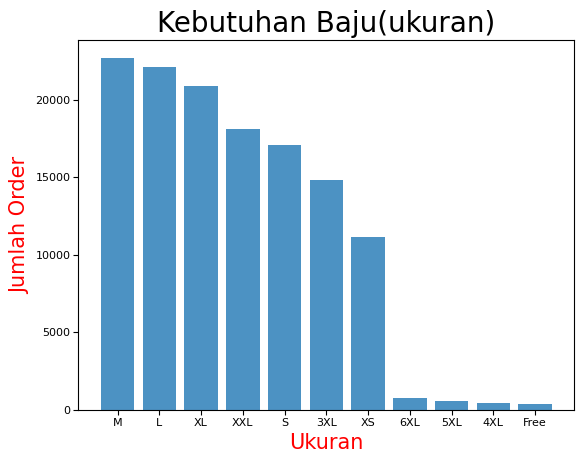

In [ ]:
plt.bar(x=d2.Size.value_counts().index,height=d2.Size.value_counts(),alpha=0.8)
plt.xlabel("Ukuran",fontdict={"size":15,"color":"r"})
plt.ylabel("Jumlah Order",fontdict={"size":15,"color":"r"})
plt.title("Kebutuhan Baju(ukuran)",fontdict={"size":20,"color":"k"})
plt.tick_params(labelsize=8,pad=2)

In [ ]:
d2['ship-city'].value_counts().head(10) #checking top 10 cities with largest amount of orders


BENGALURU    11217
HYDERABAD     8074
MUMBAI        6126
NEW DELHI     5795
CHENNAI       5421
PUNE          3857
KOLKATA       2381
GURUGRAM      1868
THANE         1701
LUCKNOW       1458
Name: ship-city, dtype: int64

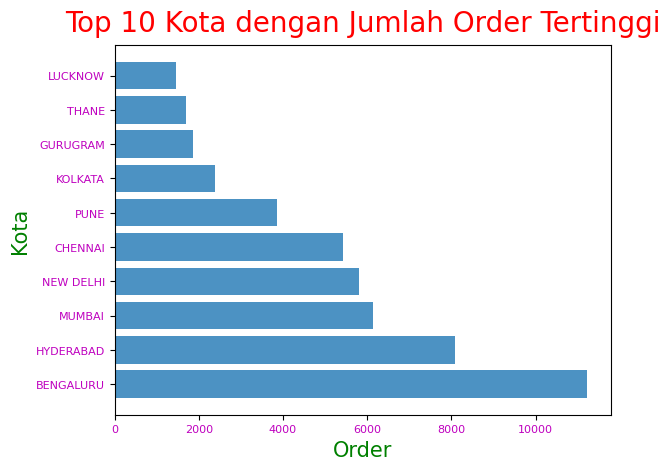

In [ ]:
plt.barh(d2['ship-city'].value_counts().head(10).index,d2['ship-city'].value_counts().head(10),alpha=0.8)
plt.title("Top 10 Kota dengan Jumlah Order Tertinggi",pad=10,fontdict={"size":20,"color":"r"})
plt.xlabel("Order",fontdict={"size":15,"color":"g"})
plt.ylabel("Kota",fontdict={"size":15,"color":"g"})
plt.tick_params(labelsize=8,labelcolor='m')
plt.show()

# Conclution


Kesimpulan

Data penjualan amazon ini memberikan pemahaman singkat tentang penjualan berbagai jenis pakaian, harga, kuantitas, ukuran,  dan kota pengiriman.

1. Ukuran baju Medium dan Large merupakan ukuran yang paling dibutuhkan.
2. Bengaluru dan Hyderabad memiliki jumlah penjualan tertinggi dibandingkan dengan kota lain.  